## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities by Using the citipy Library

In [2]:


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 625


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to Retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
  
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
  
    city_url = url + "appid=" + weather_api_key + "&q=" + city  

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | wum
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | tyukhtet
Processing Record 8 of Set 1 | forestville
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | goderich
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nhulunbuy
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | warqla
City not found. Skipping...
Processing Record 19 of Set 1 | chilia veche
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | inongo
Processing Record 22 of Set 1 | senador jose p

Processing Record 37 of Set 4 | ternate
Processing Record 38 of Set 4 | marcona
City not found. Skipping...
Processing Record 39 of Set 4 | lomovka
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | veraval
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | prabumulih
Processing Record 44 of Set 4 | crab hill
City not found. Skipping...
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | arlit
Processing Record 48 of Set 4 | novobureyskiy
Processing Record 49 of Set 4 | lgov
Processing Record 0 of Set 5 | ondjiva
Processing Record 1 of Set 5 | trinidad
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | sivagiri
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | beryslav
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | anahuac
Processing Recor

Processing Record 23 of Set 8 | panaba
Processing Record 24 of Set 8 | teya
Processing Record 25 of Set 8 | sinnai
Processing Record 26 of Set 8 | olafsvik
Processing Record 27 of Set 8 | brest
Processing Record 28 of Set 8 | kyra
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | puerto madryn
Processing Record 31 of Set 8 | jacareacanga
Processing Record 32 of Set 8 | eskasem
City not found. Skipping...
Processing Record 33 of Set 8 | ust-ilimsk
Processing Record 34 of Set 8 | axim
Processing Record 35 of Set 8 | la ronge
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | khatanga
Processing Record 38 of Set 8 | belmonte
Processing Record 39 of Set 8 | havoysund
Processing Record 40 of Set 8 | penzance
Processing Record 41 of Set 8 | hami
Processing Record 42 of Set 8 | ziro
Processing Record 43 of Set 8 | acarau
Processing Record 44 of Set 8 | serebryansk
Processing Record 45 of Set 8 | alugan
Processing Record 46 of Set 8 | burg
Pro

Processing Record 14 of Set 12 | matagami
Processing Record 15 of Set 12 | college
Processing Record 16 of Set 12 | christchurch
Processing Record 17 of Set 12 | saint-georges
Processing Record 18 of Set 12 | breyten
Processing Record 19 of Set 12 | sahuaripa
Processing Record 20 of Set 12 | laizhou
Processing Record 21 of Set 12 | beloha
Processing Record 22 of Set 12 | requena
Processing Record 23 of Set 12 | atasu
Processing Record 24 of Set 12 | yelizovo
Processing Record 25 of Set 12 | valdez
Processing Record 26 of Set 12 | awjilah
Processing Record 27 of Set 12 | thunder bay
Processing Record 28 of Set 12 | ibra
Processing Record 29 of Set 12 | samarai
Processing Record 30 of Set 12 | halalo
City not found. Skipping...
Processing Record 31 of Set 12 | qaqortoq
Processing Record 32 of Set 12 | becerril
Processing Record 33 of Set 12 | vondrozo
Processing Record 34 of Set 12 | puerto narino
Processing Record 35 of Set 12 | pout
Processing Record 36 of Set 12 | patacamaya
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_data_df = city_data_df.dropna(how="any")
# print(city_weather_df.count())

# Show Record Count
(city_data_df.count())

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,269.64,76,88,7.04,RU,1670294953
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670294953
2,wum,6.3833,10.0667,291.18,36,12,1.07,CM,1670294954
3,ushuaia,-54.8000,-68.3000,278.94,65,40,7.72,AR,1670294954
4,cape town,-33.9258,18.4232,292.25,72,0,3.60,ZA,1670294955


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,269.64,76,88,7.04,RU,1670294953
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670294953
2,wum,6.3833,10.0667,291.18,36,12,1.07,CM,1670294954
3,ushuaia,-54.8000,-68.3000,278.94,65,40,7.72,AR,1670294954
4,cape town,-33.9258,18.4232,292.25,72,0,3.60,ZA,1670294955


## Create Scatter Plots Requested

### Latitude Vs. Temperature

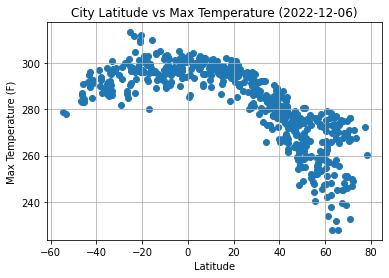

In [8]:
# Build scatter plot for latitude vs. temperature
#format the max date in the dataset as "runDate" for graph titles
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

# date_of_analysis = datetime.date(datetime.now())
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({runDate})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

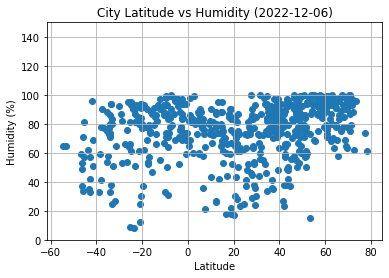

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values =city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

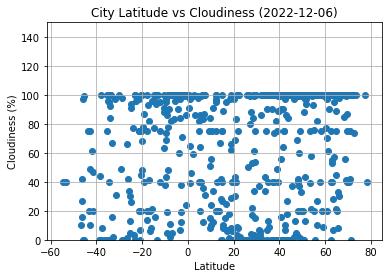

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values =city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude Vs. Wind Speed Plot

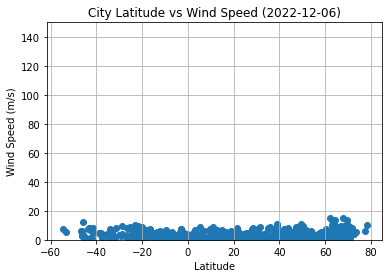

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values =city_data_df['Wind Speed']
# Incorporate the other graph properties

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({runDate})')
plt.ylim(0, 150)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,269.64,76,88,7.04,RU,1670294953
1,saskylakh,71.9167,114.0833,249.67,97,100,8.05,RU,1670294953
2,wum,6.3833,10.0667,291.18,36,12,1.07,CM,1670294954
5,norman wells,65.2820,-126.8329,245.17,69,20,8.75,CA,1670294796
6,tyukhtet,56.5389,89.3011,255.27,87,100,3.52,RU,1670294956


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,278.94,65,40,7.72,AR,1670294954
4,cape town,-33.9258,18.4232,292.25,72,0,3.60,ZA,1670294955
10,bambous virieux,-20.3428,57.7575,297.16,94,75,1.54,MU,1670294957
14,nhulunbuy,-12.2333,136.7667,305.49,55,40,6.17,AU,1670294672
15,richards bay,-28.7830,32.0377,293.03,82,98,4.15,ZA,1670294959


### Temperature Vs. Latitude Linear Regression Plot

The r-value is: -0.8404162149080424
y = -0.72x + 306.23


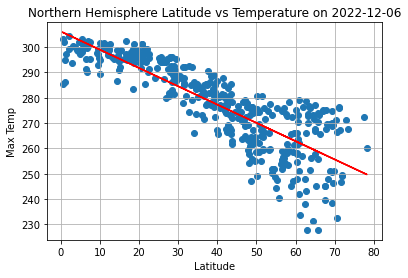

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# #tweak where the equation appears on the plot

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temperature on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Tempersature on {runDate}.png")



The r-value is: 0.545357557950598
y = 0.26x + 300.91


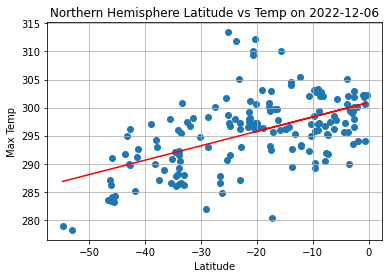

In [16]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png")

# plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()


### Discussion about the linear relationship: 

The above plots show  linear regression models between Maximum temperature and latitude for Northern and Southern Hemisphere cities. Results show a strong, negative correlation between Maximum tempreture and latitude for Northern Hemisphere cities. One possible implication is that the climate near the equator is hotter, so as we move north from the equator, the maximum Temperature (F) decreases. For the Southern Hemisphere cities, there is a weak positive relationship between Maximum Tempereture and latitude .

### Humidity Vs. Latitude Linear Regression Plot

The r-value is: 0.3410219474810832
y = 0.33x + 63.33


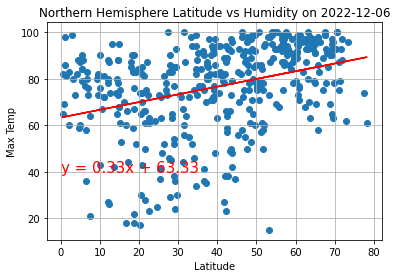

In [17]:
# Northern Hemisphere
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Humidity on {runDate}.png")


The r-value is: 0.35908766519071916
y = 0.53x + 83.4


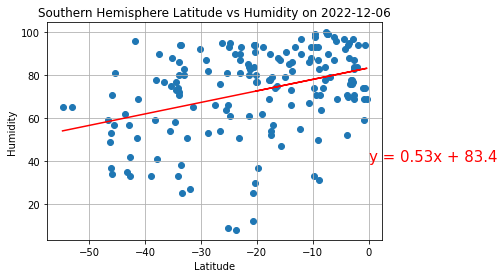

In [18]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png")


### Discussion about the linear relationship:
The above plots show linear regression models between Humidity (%) and Latitude for Northern  and Southern Hemisphere cities. Results indicate a weak positive relation between Humidity (%) and Latitude for both the Northern and Southern Hemisphere cities. 

### Cloudiness Vs. Latitude Linear Regression Plot

The r-value is: 0.24403270584526468
y = 0.5x + 40.69


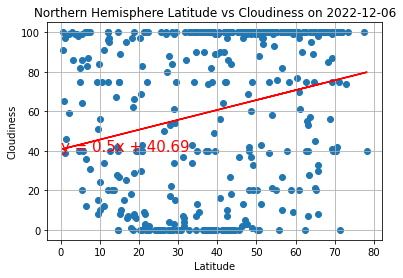

In [19]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png")

The r-value is: 0.34610265609592694
y = 0.97x + 79.27


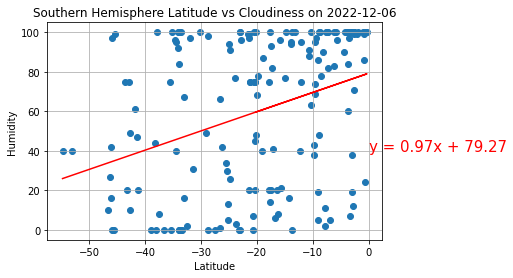

In [20]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png")

### Discussion about the linear relationship: 

The plots above depict linear regression models between Cloudiness (%) and Latitude for Northern and Southern Hemisphere cities. results from the data indicate very weak positive correlation between Cloudiness (%) and Latitude for the cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2006679726507147
y = 0.03x + 2.22


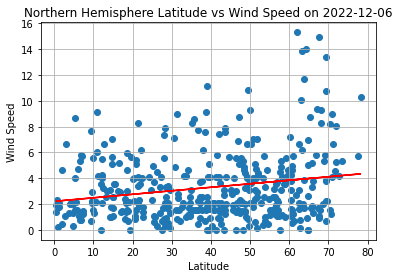

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png")

The r-value is: -0.35990156751750246
y = -0.07x + 2.15


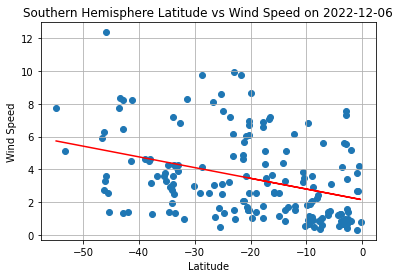

In [22]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png")

### Discussion about the linear relationship: 

The above plots depict linear regression models between Wind Speed (mph), and latitude for Northern and Southern Hemisphere cities. Results from the model indicate a weak to almsost non existent positive relationship for the Northern Hemisphere cities and a weak negative relation for the Southern Hemisphere cities